# Introduction to Pandas as a Data Handling Framework
1. Data Structures in Pandas 
2. Handling Data in Pandas 
3. Different Methods invovled 

In [70]:
import pandas as pd 
import numpy as np 

## Series Class in Pandas

In [71]:
# It is just like a One-Dimensional Array which has values and associated with it is index array 
#  Index array can be manipulated to use our own labels or to start from a Specific Point 
# By Defualt it Starts from 0

data = pd.Series([9.75,8.1,7.22,9,8.9,7.85])
print(data)

0    9.75
1    8.10
2    7.22
3    9.00
4    8.90
5    7.85
dtype: float64


**Index and Values Attributes in Series**

In [72]:
# Values Attributes Shows the list of all the values in the given Series Object 
print(data.values)
print("The Data Type of the data.values is :",type(data.values))
# Returns an nd Array
print(data.index)

[9.75 8.1  7.22 9.   8.9  7.85]
The Data Type of the data.values is : <class 'numpy.ndarray'>
RangeIndex(start=0, stop=6, step=1)


**Using Labels for Indexing**

In [73]:
sdata=pd.Series(data.values,index=['Mark','Lucifer','Heisenberg','Allen','Neil','Rubet'])
print(sdata)
# We can Customize the Labels so that we can handle data as per our convenienece 

# Similar to Array Indexing data can fetched using the labels in place of indices 
# When Labels are Used we can't use the Integers for Indexing Purpose 
print("Te SGPA of Mark is : ",sdata['Mark'])
print(type(sdata['Mark']))
print("The Grade for Lucifer is :",sdata['Lucifer'])
print(type(sdata['Mark']))
print(sdata[['Lucifer','Mark','Rubet']]) # Passing List of Columns
print(type(sdata[['Lucifer','Mark','Rubet']]))

# Note that When we pass Single Label data type of value is returned 
# But When we use list to access multiple Labels Series dtype is returned 

Mark          9.75
Lucifer       8.10
Heisenberg    7.22
Allen         9.00
Neil          8.90
Rubet         7.85
dtype: float64
Te SGPA of Mark is :  9.75
<class 'numpy.float64'>
The Grade for Lucifer is : 8.1
<class 'numpy.float64'>
Lucifer    8.10
Mark       9.75
Rubet      7.85
dtype: float64
<class 'pandas.core.series.Series'>


**Filtering using Boolean , Scalar Multiplication,Math Functions Arithmetic Operations**

In [74]:
# Note that performing the above on Series dtype presever the 'index-value' Link together 

print("All the gpas above 8 pointers \n",sdata[sdata>8.00]) # Filters out all the Seires Type of Indexing using Conditions
print("Normalizing Data on the Scale of 0-1 \n",sdata/10)
print(sdata)

All the gpas above 8 pointers 
 Mark       9.75
Lucifer    8.10
Allen      9.00
Neil       8.90
dtype: float64
Normalizing Data on the Scale of 0-1 
 Mark          0.975
Lucifer       0.810
Heisenberg    0.722
Allen         0.900
Neil          0.890
Rubet         0.785
dtype: float64
Mark          9.75
Lucifer       8.10
Heisenberg    7.22
Allen         9.00
Neil          8.90
Rubet         7.85
dtype: float64


**Transforming to Series using *Constructors***

In [75]:
# To better understand how the Data is ACtually Stored in Seires 
# Dictionary is the best way to Understand it 
#  Each key corresponds to a index label 
#  Each  Value Corresponds to a Values in Series

dict_={
	'India':'Delhi',
	'Japan':'Tokyo',
	"USA":'Washington D.C',
	'China':'Bejing',
	'France':'Paris',
	'United Kingdon':'London'
}

# Converting it to Pandas Series 
capitals=pd.Series(dict_)
print(capitals)

# Playing with indexes 
#  Filtering out data , Combining the Data can also be done using index Labels 
# When you are only passing a dict, the index in the resulting Series will have the dict’s
#  keys in sorted order. You can override this by passing the dict keys in the order you
#  want them to appear in the resulting Series:
index_capitals=['India','China','France','United Kingdom','Germany','Sweden']
capped_indexed_capitals=pd.Series(dict_,index=index_capitals)
print("Personalized Indexing to override key values order in dictionary : \n",capped_indexed_capitals)

# The NaN -->(Not a Number ) That the Index order passed had index which was not available as a Key in the Given 
# Dictionary

# When Overiding the Key:values in dictionary using indexes the index not mentioned explicitly in the
# index attribute won't be taken into Consideration in the Series  

India                      Delhi
Japan                      Tokyo
USA               Washington D.C
China                     Bejing
France                     Paris
United Kingdon            London
dtype: object
Personalized Indexing to override key values order in dictionary : 
 India              Delhi
China             Bejing
France             Paris
United Kingdom       NaN
Germany              NaN
Sweden               NaN
dtype: object


***Using `inull()` & `notnull()` Functions in Pandas or onthe Series Object itself***

In [76]:
# Both isnull() and notnull() returns us Series object with dtype boolean
# These methods can be used using Pandas or as a instance methods in Series
print("The Null Values in Series are as follows : ",pd.isnull(index_capitals))
print(capped_indexed_capitals.isnull())
print("Using the NotNull Functions : \n",capped_indexed_capitals.notna())

The Null Values in Series are as follows :  [False False False False False False]
India             False
China             False
France            False
United Kingdom     True
Germany            True
Sweden             True
dtype: bool
Using the NotNull Functions : 
 India              True
China              True
France             True
United Kingdom    False
Germany           False
Sweden            False
dtype: bool


**Alignment during operations by index Labels & The `name` Attribute in Pandas**

In [77]:
# Using seires we can automatically align data usign the index labels 
#  Creating two similar types of Series Data 

s1=pd.Series([3.4,3.54,0.9,2.54,0.3,0.5],index=['USA','China','Japan','Germany','India','Brazil'])
s1.name="GDP of Countries Post Covid-19"
s1.index.name="Countries"

# Series related to some indexing parameters lets say adjustment rate overtime 
s2=pd.Series([0.0023,0.000054,0.00021,0.002,0.00003,0.000235],index=['USA','China','Japan','Germany','India','Brazil'])
s2.name="Rate adjustment Post Covid -19"
s2.index.name="Countries"
# The name attribute is Associated with the Series.index (with the index of the Series)
# Also the name attribute is Associated with Series as a Whole itself 
# Kind of Like More data explaining the given data 

print(f"the given data shows : {s1.name} \n {s1} \n")

print(f"the given data shows : {s2.name} \n {s2} \n")

# Now Both the Parameters can be combined by using the label for indexing to get
# meaningful data for current scenario

print(s1+s2)


the given data shows : GDP of Countries Post Covid-19 
 Countries
USA        3.40
China      3.54
Japan      0.90
Germany    2.54
India      0.30
Brazil     0.50
Name: GDP of Countries Post Covid-19, dtype: float64 

the given data shows : Rate adjustment Post Covid -19 
 Countries
USA        0.002300
China      0.000054
Japan      0.000210
Germany    0.002000
India      0.000030
Brazil     0.000235
Name: Rate adjustment Post Covid -19, dtype: float64 

Countries
USA        3.402300
China      3.540054
Japan      0.900210
Germany    2.542000
India      0.300030
Brazil     0.500235
dtype: float64


## DataFrame Class in Pandas

*The DataFrame has both a row and column index; it can be thought of as a dict of Series all sharing the same index. Under the hood, the data is stored as one or more two-dimensional blocks rather than a list, dict, or some other collection of one-dimensional arrays. The exact details of DataFrame’s internals are outside the scope of this book.*

**Using the Dataframe Constructor to Form a df by passing relevant parameters**

In [78]:
# One of the best ways to create dataframes is by using Dictionary of one-d Lists
# This can be sasid as passing of objects to the Dataframe Constructor 

stock_dict={
	"Stock Name":['ADANIENT','RELIANCE','POWERGRID','SBIN','TATAMOTORS','JUSTDIAL','ZOMATO','M&M'],
	"Company Name":['Adani Enterprises','Reliance','Power Grid','State Bank of India','Tata Motors','Just Dial','Zomato','Mahindra & Mahindra'],
	"Opening Price":[3065.00,2940.30,333.30,806.60,1101.45,1266,275.25,2829.80],
	"Closing Price":[3109,2957.75,339,811.40,1090,1288.55,263.24,2767]

}

stock_df=pd.DataFrame(stock_dict)
stock_df

,Stock Name,Company Name,Opening Price,Closing Price
0,ADANIENT,Adani Enterprises,3065.00,3109.00
1,RELIANCE,Reliance,2940.30,2957.75
2,POWERGRID,Power Grid,333.30,339.00
3,SBIN,State Bank of India,806.60,811.40
4,TATAMOTORS,Tata Motors,1101.45,1090.00
5,JUSTDIAL,Just Dial,1266.00,1288.55
6,ZOMATO,Zomato,275.25,263.24
7,M&M,Mahindra & Mahindra,2829.80,2767.00


**Methods & Attributes  in Data Frames**
1. Passing args to Constructor of Dataframe class 
2. Columns Attribute
3. Index Attribute
4. Retrieving Columns as an Individual Seires in Pandas 
5. Accessing the Rows using the `loc` Attribute
6. Creating New Columns and Insertion at Speified Location using the Index Attribute
7. Passing Nested Dictionaries to Constructor of the Dataframe

In [79]:
# To display first 5 rows of dataframe using head() method be defult parameter
# head(5)
stock_df.head(2)

# Arranging the Columns of the Dataframe can be done while making dict to df 
print(pd.DataFrame(stock_dict,columns=['Company Name','Stock Name','Opening Price','Closing Price']))

# Similarly the Index Attribute can also be changed just like with Series Object
stock_df=pd.DataFrame(stock_dict,index=[1,2,3,4,5,6,7,8])
print("\n",stock_df)

# print(stock_df.columns)  # Return Index Object of all the Columns present in the dataset
# type(stock_df.columns)

          Company Name  Stock Name  Opening Price  Closing Price
0    Adani Enterprises    ADANIENT        3065.00        3109.00
1             Reliance    RELIANCE        2940.30        2957.75
2           Power Grid   POWERGRID         333.30         339.00
3  State Bank of India        SBIN         806.60         811.40
4          Tata Motors  TATAMOTORS        1101.45        1090.00
5            Just Dial    JUSTDIAL        1266.00        1288.55
6               Zomato      ZOMATO         275.25         263.24
7  Mahindra & Mahindra         M&M        2829.80        2767.00

    Stock Name         Company Name  Opening Price  Closing Price
1    ADANIENT    Adani Enterprises        3065.00        3109.00
2    RELIANCE             Reliance        2940.30        2957.75
3   POWERGRID           Power Grid         333.30         339.00
4        SBIN  State Bank of India         806.60         811.40
5  TATAMOTORS          Tata Motors        1101.45        1090.00
6    JUSTDIAL          

In [80]:
# Accessing Columns in a DataFrame : -
# 1. Using indexing by Column Labels 
print(stock_df['Company Name'])

print("Accessing Multiple Cloumns : ",stock_df[['Company Name','Stock Name']])
# Accessing Multiple Columns at Once by Passing List of Columns for Indexing



1      Adani Enterprises
2               Reliance
3             Power Grid
4    State Bank of India
5            Tata Motors
6              Just Dial
7                 Zomato
8    Mahindra & Mahindra
Name: Company Name, dtype: object
Accessing Multiple Cloumns :            Company Name  Stock Name
1    Adani Enterprises    ADANIENT
2             Reliance    RELIANCE
3           Power Grid   POWERGRID
4  State Bank of India        SBIN
5          Tata Motors  TATAMOTORS
6            Just Dial    JUSTDIAL
7               Zomato      ZOMATO
8  Mahindra & Mahindra         M&M


**Important Note :** \
*frame2[column] works for any column name, but frame2.column only works when the column name is a valid Python variable name* \
If a Columns name is not present then new Columns  can be created using df['Column_Name']

In [81]:
print(stock_df.head())

stock_df['Stock Name']
# It is important to Note that all the Columns which has valid name attribute present in This inabove Case 'Stock Name' is clearly visible can be accessed using 
#  df.column_name but in this example the column name has two words Stock Name --> PROBLEM ??? 

   Stock Name         Company Name  Opening Price  Closing Price
1    ADANIENT    Adani Enterprises        3065.00        3109.00
2    RELIANCE             Reliance        2940.30        2957.75
3   POWERGRID           Power Grid         333.30         339.00
4        SBIN  State Bank of India         806.60         811.40
5  TATAMOTORS          Tata Motors        1101.45        1090.00


1      ADANIENT
2      RELIANCE
3     POWERGRID
4          SBIN
5    TATAMOTORS
6      JUSTDIAL
7        ZOMATO
8           M&M
Name: Stock Name, dtype: object

In [82]:
# Accesssing the Rows
print(stock_df)
# Syntax --> 
#  df.loc[labels/index/list of indices]
print("Fethiing the data of 3rd rows ",stock_df.loc[3]) 

   Stock Name         Company Name  Opening Price  Closing Price
1    ADANIENT    Adani Enterprises        3065.00        3109.00
2    RELIANCE             Reliance        2940.30        2957.75
3   POWERGRID           Power Grid         333.30         339.00
4        SBIN  State Bank of India         806.60         811.40
5  TATAMOTORS          Tata Motors        1101.45        1090.00
6    JUSTDIAL            Just Dial        1266.00        1288.55
7      ZOMATO               Zomato         275.25         263.24
8         M&M  Mahindra & Mahindra        2829.80        2767.00
Fethiing the data of 3rd rows  Stock Name        POWERGRID
Company Name     Power Grid
Opening Price         333.3
Closing Price         339.0
Name: 3, dtype: object


*In Python the `NULL` is represented by `None` Keyword*

In [83]:
# Creating new Columns :-
stock_df['Net Profit']=stock_df['Closing Price']-stock_df['Opening Price']
# New Label for Stock Exhange 
stock_df['Exchange']='NSE'
stock_df

# Creating a null Column
stock_df['Position']=np.nan
stock_df


,Stock Name,Company Name,Opening Price,Closing Price,Net Profit,Exchange,Position
1,ADANIENT,Adani Enterprises,3065.00,3109.00,44.00,NSE,NaN
2,RELIANCE,Reliance,2940.30,2957.75,17.45,NSE,NaN
3,POWERGRID,Power Grid,333.30,339.00,5.70,NSE,NaN
4,SBIN,State Bank of India,806.60,811.40,4.80,NSE,NaN
5,TATAMOTORS,Tata Motors,1101.45,1090.00,-11.45,NSE,NaN
6,JUSTDIAL,Just Dial,1266.00,1288.55,22.55,NSE,NaN
7,ZOMATO,Zomato,275.25,263.24,-12.01,NSE,NaN
8,M&M,Mahindra & Mahindra,2829.80,2767.00,-62.80,NSE,NaN


In [84]:
#Placing certaing values in position columns using Index labels for insertion at spcified rows for position column
stock_df['Position']=pd.Series(['Short','None'],index=[1,4])
stock_df


,Stock Name,Company Name,Opening Price,Closing Price,Net Profit,Exchange,Position
1,ADANIENT,Adani Enterprises,3065.00,3109.00,44.00,NSE,Short
2,RELIANCE,Reliance,2940.30,2957.75,17.45,NSE,NaN
3,POWERGRID,Power Grid,333.30,339.00,5.70,NSE,NaN
4,SBIN,State Bank of India,806.60,811.40,4.80,NSE,None
5,TATAMOTORS,Tata Motors,1101.45,1090.00,-11.45,NSE,NaN
6,JUSTDIAL,Just Dial,1266.00,1288.55,22.55,NSE,NaN
7,ZOMATO,Zomato,275.25,263.24,-12.01,NSE,NaN
8,M&M,Mahindra & Mahindra,2829.80,2767.00,-62.80,NSE,NaN


*The column returned from indexing a DataFrame is a view on the underlying data, not a copy. Thus, any in-place modifications to the Series will be reflected in the DataFrame. The column can be explicitly copied with the Series’s copy method.*

In [85]:
# Using Nested Dictionaries to Create DataFrame 
#  If the nested dict is passed to the DataFrame, pandas will interpret the outer dict keys
#  as the columns and the inner keys as the row indices:

housing_={
	"Andheri":{'1BHK':1.50,'3BHK':5.0},
	"Malabar Hills":{'1BHK':10.00,'3BHK':20.00,'2BHK':15.00}
}

# Passing the Arguments to Consturctor of Dataframe :
house_df=pd.DataFrame(housing_,index=['1BHK','2BHK','3BHK'])
house_df

,Andheri,Malabar Hills
1BHK,1.5,10.0
2BHK,NaN,15.0
3BHK,5.0,20.0


In [86]:
# Using Transpose on the Dictionary : 
print(house_df.T)

# Similary Like Nested Dictionaries / (We can pass Dictionaries of Series Instead)
# Using The Existing House_df to Extract a Series AThrough Indexing/ Slicing 

series_df ={
	'Andheri':house_df['Andheri'][:-1],  # Here -1 Index is Excluded 
	'Malabar Hills':house_df['Malabar Hills'][:3]   # here the third index is excluded 
}
# Converting to a Dataframe 
print(pd.DataFrame(series_df))


               1BHK  2BHK  3BHK
Andheri         1.5   NaN   5.0
Malabar Hills  10.0  15.0  20.0
      Andheri  Malabar Hills
1BHK      1.5           10.0
2BHK      NaN           15.0
3BHK      NaN           20.0


* `name` Attribute for Dataframe's Index's and Columns

In [87]:
# Name Attribute 
house_df.index.name='Area'
house_df.columns.name='Location'
house_df

Location,Andheri,Malabar Hills
Area,,
1BHK,1.5,10.0
2BHK,NaN,15.0
3BHK,5.0,20.0



* As with Series, the `values` attribute returns the data contained in the DataFrame as a  two-dimensional ndarray

In [88]:
house_df.values
# Returns values in 2d array 

array([[ 1.5, 10. ],
       [ nan, 15. ],
       [ 5. , 20. ]])

![Screenshot 2024-08-19 094821.png](<attachment:Screenshot 2024-08-19 094821.png>)
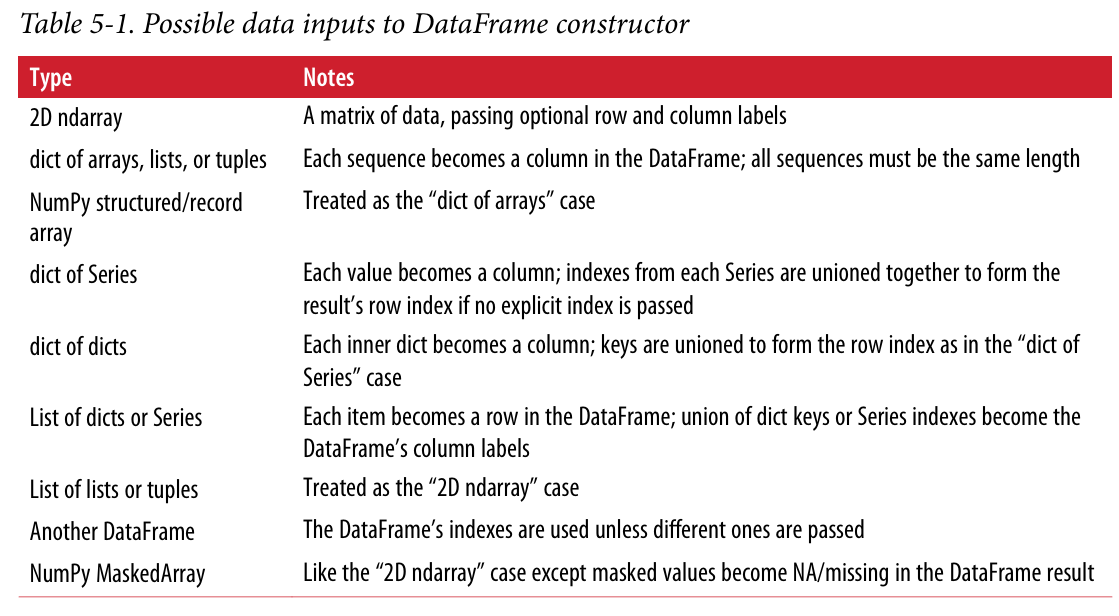

## Index Class in Pandas 
*  pandas’s Index objects are responsible for holding the `axis labels` and other metadata (like the `axis name` or `names`). Any array or other `sequence of labels` you use when constructing a Series or DataFrame is `internally converted to an Index`

1. Indexes are immutable & can't be modified by the user 
2. Immutability makes it safer to share Index objects among data structures


In [89]:
stock_df

,Stock Name,Company Name,Opening Price,Closing Price,Net Profit,Exchange,Position
1,ADANIENT,Adani Enterprises,3065.00,3109.00,44.00,NSE,Short
2,RELIANCE,Reliance,2940.30,2957.75,17.45,NSE,NaN
3,POWERGRID,Power Grid,333.30,339.00,5.70,NSE,NaN
4,SBIN,State Bank of India,806.60,811.40,4.80,NSE,None
5,TATAMOTORS,Tata Motors,1101.45,1090.00,-11.45,NSE,NaN
6,JUSTDIAL,Just Dial,1266.00,1288.55,22.55,NSE,NaN
7,ZOMATO,Zomato,275.25,263.24,-12.01,NSE,NaN
8,M&M,Mahindra & Mahindra,2829.80,2767.00,-62.80,NSE,NaN


In [90]:
# index is although a very small topic it plays a crucial role while dealing with data stock_df
print("All thwe Columns are stored in the Following format : ",type(stock_df.columns))
print("All the index labels are stored in the following format : ",type(stock_df.index))

# Note that when we pass list for indices to index attribute it gets internally converted to index object
# Example: -
label=[1,2,3,4,5]
print(f'The dtype of {label} is {type(label)} ')
index_list=pd.Index(label)
print(f'The dtype of {index_list} is {type(index_list)} ')

# Now once the above label list has been transformed to index object it can never be modified 
# index_list[2]=78 --> Throws a 'TypeError'

All thwe Columns are stored in the Following format :  <class 'pandas.core.indexes.base.Index'>
All the index labels are stored in the following format :  <class 'pandas.core.indexes.base.Index'>
The dtype of [1, 2, 3, 4, 5] is <class 'list'> 
The dtype of Index([1, 2, 3, 4, 5], dtype='int64') is <class 'pandas.core.indexes.base.Index'> 


In [91]:
# Many Set-Like Operations are supported by the Index Object 
# Unlike Python sets, a pandas Index can contain duplicate labels
# Selections with duplicate labels will select all occurrences of that label.


![Screenshot 2024-08-19 095354.png](<attachment:Screenshot 2024-08-19 095354.png>)
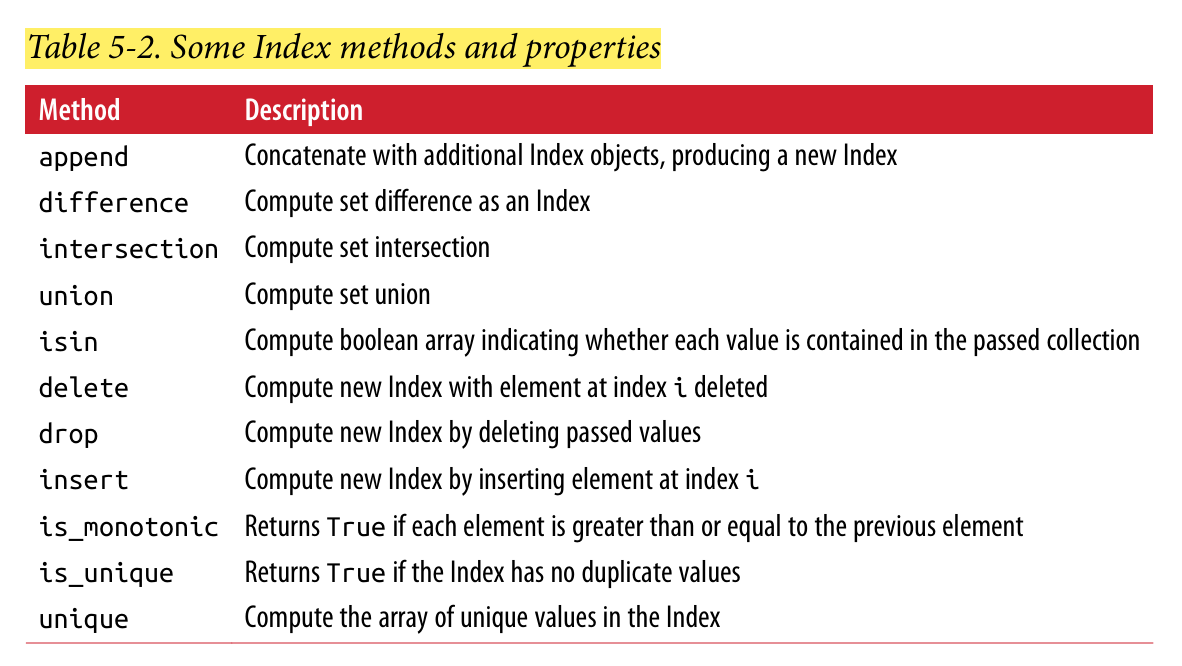

# Essential Functionality in Pandas 

### reindex method on pandas objects
* An important method on pandas objects is reindex, which means to create a new object with the data conformed to a new index
*However it is important to note that the order will be followed as per the previous indexing and any element missing in the new indexing will be taken as `NaN`*

#### On Pandas Series 

In [92]:
count=pd.Series(['USA','China','France','Germany','India','Japan','UK'],index=[6,4,3,5,2,1,7])
print(count,"\n")

# Note that a New Pandas Object is created when we use the 'reindex' method on Series,Dataframe,etc

ord_count=count.reindex([1,2,3,4,5,6,7,8])
print(ord_count)

6        USA
4      China
3     France
5    Germany
2      India
1      Japan
7         UK
dtype: object 

1      Japan
2      India
3     France
4      China
5    Germany
6        USA
7         UK
8        NaN
dtype: object


*For ordered data like time series, it may be desirable to do some interpolation or filling of values when reindexing. The method option allows us to do this, using a method such as ffill, which `forward-fills` the values*

In [93]:
color=pd.Series(["blue","green","red","yellow"],index=[3,4,7,8])
print(color,"\n")

color_ser=color.reindex([1,2,3,4,5,6,7,8],method="ffill")
print(color_ser)


3      blue
4     green
7       red
8    yellow
dtype: object 

1       NaN
2       NaN
3      blue
4     green
5     green
6     green
7       red
8    yellow
dtype: object


#### On Pandas DataFrame 

In [94]:
# When Considering DataFrames:
# With DataFrame, reindex can alter either the (row) index, columns, or both. When passed
# only a sequence, it reindexes the rows in the result:

# Creating Data Frame using NumPy Arrays : 
arr_df = pd.DataFrame(np.arange(9).reshape(3,3),index=[2,4,5],columns=['C1','C2','C3'])
print(arr_df,"\n")

dup_arr_df=arr_df.reindex(index=[1,2,3,4,5],columns=['C1','C2','C3','C10'])
print(dup_arr_df)

# All the values which are not present in the orginal df and which are called upon in the reindex method
# Will be Assigned as the null values 



   C1  C2  C3
2   0   1   2
4   3   4   5
5   6   7   8 

    C1   C2   C3  C10
1  NaN  NaN  NaN  NaN
2  0.0  1.0  2.0  NaN
3  NaN  NaN  NaN  NaN
4  3.0  4.0  5.0  NaN
5  6.0  7.0  8.0  NaN


**As we’ll explore in more detail, you can reindex more succinctly by label-indexing with loc, and many users prefer to use it exclusively**

![Screenshot 2024-08-19 103114.png](<attachment:Screenshot 2024-08-19 103114.png>)
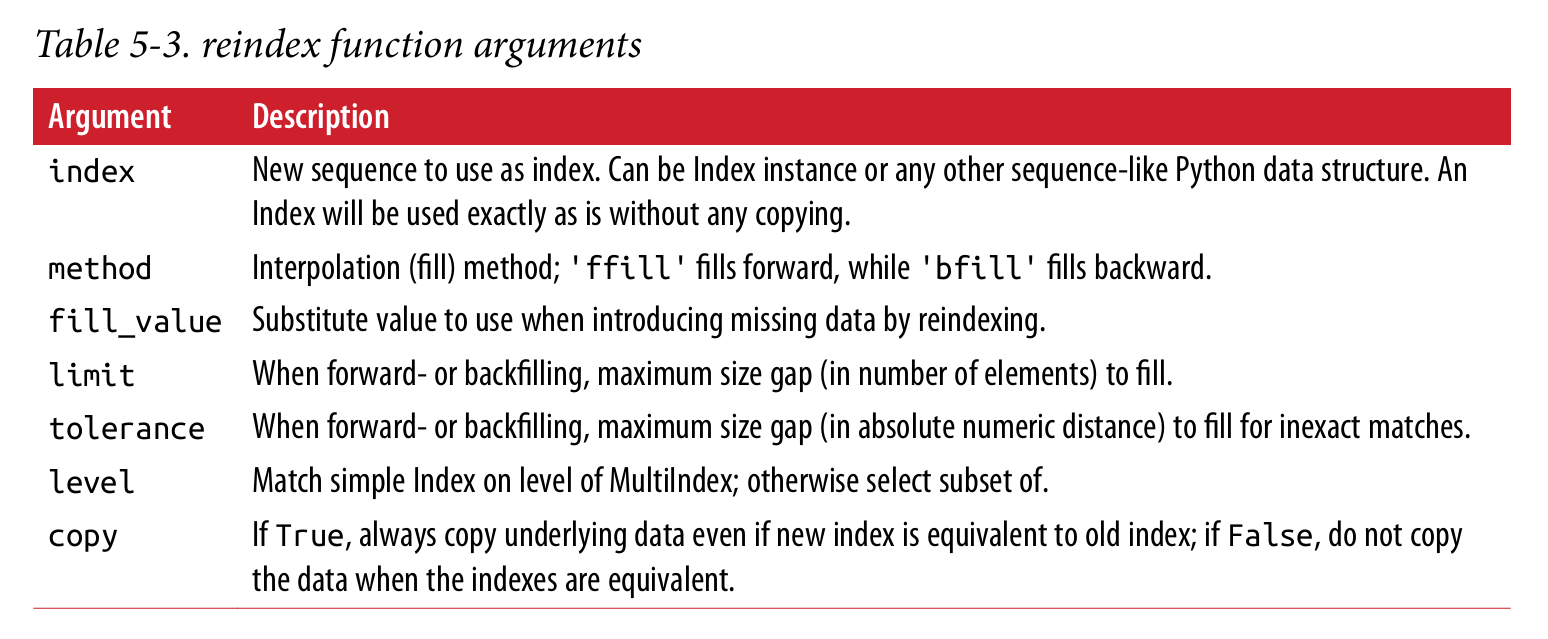

### Dropping Entries From an Axis in Pandas
*Note that `axis=1` means columns and `axis=0` means rows* 

In [95]:
# Two Methods to drop rows/columns :
# note that the df.drop() returns a new object so if we want to make our changes permanent 
# we have to use the foll syntax -
#  df = df.drop() 
# Or else 2nd Method is to use the inplace operator :-
#  df.drop([],axis=' ' , inplace=True/False)
# True Overides the orginal Object without syntax heavy work 
#  Whereas False just shows us the copy of the original df 

stock_df
# If I want to drop the whole sbi row 
# Showing Copy 
# In order to drop the rows we have to use the index or labels of the rows 
print("\n",stock_df.drop(4,axis=0,inplace=False) )

print("The type of object returned is : ",type(stock_df.drop(4,axis=0,inplace=False)))
print("The original Dataframe is Still :  \n",stock_df)


    Stock Name         Company Name  Opening Price  Closing Price  Net Profit  \
1    ADANIENT    Adani Enterprises        3065.00        3109.00       44.00   
2    RELIANCE             Reliance        2940.30        2957.75       17.45   
3   POWERGRID           Power Grid         333.30         339.00        5.70   
5  TATAMOTORS          Tata Motors        1101.45        1090.00      -11.45   
6    JUSTDIAL            Just Dial        1266.00        1288.55       22.55   
7      ZOMATO               Zomato         275.25         263.24      -12.01   
8         M&M  Mahindra & Mahindra        2829.80        2767.00      -62.80   

  Exchange Position  
1      NSE    Short  
2      NSE      NaN  
3      NSE      NaN  
5      NSE      NaN  
6      NSE      NaN  
7      NSE      NaN  
8      NSE      NaN  
The type of object returned is :  <class 'pandas.core.frame.DataFrame'>
The original Dataframe is Still :  
    Stock Name         Company Name  Opening Price  Closing Price  Net Pr

In [96]:
# Same Concept Goes with series 
#  If we want to drop single row/column we pass the label/column name 
# incase of multiple drops we pass lists of label/column name 

stock_df
stock_df.drop(['Exchange','Position'],axis=1)

# stock_df=stock_df.drop(['Exchange','Position'],axis=1)  can be done to make changes permanent
#  OR stock_df.drop(['Exchange','Position'],axis=1, Inplace=True)

,Stock Name,Company Name,Opening Price,Closing Price,Net Profit
1,ADANIENT,Adani Enterprises,3065.00,3109.00,44.00
2,RELIANCE,Reliance,2940.30,2957.75,17.45
3,POWERGRID,Power Grid,333.30,339.00,5.70
4,SBIN,State Bank of India,806.60,811.40,4.80
5,TATAMOTORS,Tata Motors,1101.45,1090.00,-11.45
6,JUSTDIAL,Just Dial,1266.00,1288.55,22.55
7,ZOMATO,Zomato,275.25,263.24,-12.01
8,M&M,Mahindra & Mahindra,2829.80,2767.00,-62.80


#### Indexing , Selection and Filtering 
*Slicing with labels behaves differently than normal Python slicing in that the end point is inclusive*

In [97]:
# Note that Indexing is Similar to that of NumPy arrays in case of Pandas 
# There's Only One Difference in case of Slicing last index is inclusive
stock_df



,Stock Name,Company Name,Opening Price,Closing Price,Net Profit,Exchange,Position
1,ADANIENT,Adani Enterprises,3065.00,3109.00,44.00,NSE,Short
2,RELIANCE,Reliance,2940.30,2957.75,17.45,NSE,NaN
3,POWERGRID,Power Grid,333.30,339.00,5.70,NSE,NaN
4,SBIN,State Bank of India,806.60,811.40,4.80,NSE,None
5,TATAMOTORS,Tata Motors,1101.45,1090.00,-11.45,NSE,NaN
6,JUSTDIAL,Just Dial,1266.00,1288.55,22.55,NSE,NaN
7,ZOMATO,Zomato,275.25,263.24,-12.01,NSE,NaN
8,M&M,Mahindra & Mahindra,2829.80,2767.00,-62.80,NSE,NaN


In [98]:
# Indexing in case of Series 
print("\n",capitals[:5])

print("\n"+"Output :")
# Using the Index Labels 
print(capitals['India':'USA'])


 India              Delhi
Japan              Tokyo
USA       Washington D.C
China             Bejing
France             Paris
dtype: object

Output :
India             Delhi
Japan             Tokyo
USA      Washington D.C
dtype: object


**It becomes very important to note that only in case of Slicing using the `index_label` the end point sliced part is inclusive of the data set and not for all. All other follow standard python convention of ignoring the exclusing the end point**

In [99]:
# There's a better example to show how the indexing works in case of using the labels of the indexes
stock_index_df=pd.DataFrame(stock_dict,index=['One','Two','Three','Four','Five','Six','Seven','Eight'])
stock_index_df.index.name="Ranking"
stock_index_df.columns.name="STCK DATA"
stock_index_df

# Notice that here the index labels are used in the form of strings and hence we can conveninetly use the
# the concept of slicing where the end point is included 

STCK DATA,Stock Name,Company Name,Opening Price,Closing Price
Ranking,,,,
One,ADANIENT,Adani Enterprises,3065.00,3109.00
Two,RELIANCE,Reliance,2940.30,2957.75
Three,POWERGRID,Power Grid,333.30,339.00
Four,SBIN,State Bank of India,806.60,811.40
Five,TATAMOTORS,Tata Motors,1101.45,1090.00
Six,JUSTDIAL,Just Dial,1266.00,1288.55
Seven,ZOMATO,Zomato,275.25,263.24
Eight,M&M,Mahindra & Mahindra,2829.80,2767.00


In [100]:
stock_index_df['One':'Four']
# All including the Fourth columns gets printed 

STCK DATA,Stock Name,Company Name,Opening Price,Closing Price
Ranking,,,,
One,ADANIENT,Adani Enterprises,3065.0,3109.00
Two,RELIANCE,Reliance,2940.3,2957.75
Three,POWERGRID,Power Grid,333.3,339.00
Four,SBIN,State Bank of India,806.6,811.40


In [101]:
#  However if we use the conventional method of printing it (i.e using the integers without label)
stock_index_df[2:6]
# 6th index was excluded as usual

STCK DATA,Stock Name,Company Name,Opening Price,Closing Price
Ranking,,,,
Three,POWERGRID,Power Grid,333.30,339.00
Four,SBIN,State Bank of India,806.60,811.40
Five,TATAMOTORS,Tata Motors,1101.45,1090.00
Six,JUSTDIAL,Just Dial,1266.00,1288.55


In [102]:
# We can pass a sequence as an argument to retrieve list of columns in case same goes for the 
# pandas series

stock_index_df[['Stock Name','Company Name']]

STCK DATA,Stock Name,Company Name
Ranking,,
One,ADANIENT,Adani Enterprises
Two,RELIANCE,Reliance
Three,POWERGRID,Power Grid
Four,SBIN,State Bank of India
Five,TATAMOTORS,Tata Motors
Six,JUSTDIAL,Just Dial
Seven,ZOMATO,Zomato
Eight,M&M,Mahindra & Mahindra


*`stock_index_df[sequence/list]` can be only used to recover list of Columns and not in case of rows*

**The row selection syntax `stock_index_df[:2]` is provided as a convenience. Passing a single element or a list to the [] operator selects columns. Another use case is in indexing with a boolean DataFrame, such as one produced by a scalar comparison** \
*Folllowing are some of the examples :-*


In [103]:
# Examples :-
stock_index_df[:6] 
# Used to only select rows 

STCK DATA,Stock Name,Company Name,Opening Price,Closing Price
Ranking,,,,
One,ADANIENT,Adani Enterprises,3065.00,3109.00
Two,RELIANCE,Reliance,2940.30,2957.75
Three,POWERGRID,Power Grid,333.30,339.00
Four,SBIN,State Bank of India,806.60,811.40
Five,TATAMOTORS,Tata Motors,1101.45,1090.00
Six,JUSTDIAL,Just Dial,1266.00,1288.55


In [104]:
# Boolean based selection can also be done convenienece
stock_index_df[stock_index_df['Opening Price']>1500]
# This Things does the work of filtering 

STCK DATA,Stock Name,Company Name,Opening Price,Closing Price
Ranking,,,,
One,ADANIENT,Adani Enterprises,3065.0,3109.00
Two,RELIANCE,Reliance,2940.3,2957.75
Eight,M&M,Mahindra & Mahindra,2829.8,2767.00


### Selection of rows and columns using `loc` for index labels &   `iloc` for integers more convenient approach \
*It is important to note that here we use the square brackets jult like the selection in case of arrays in NumPy `stock_index_df.loc['row/seq_of_rows','columns/sequence_of_cols']`* \
**Both indexing functions work with slices in addition to single labels or lists of labels**

In [105]:
stock_index_df

STCK DATA,Stock Name,Company Name,Opening Price,Closing Price
Ranking,,,,
One,ADANIENT,Adani Enterprises,3065.00,3109.00
Two,RELIANCE,Reliance,2940.30,2957.75
Three,POWERGRID,Power Grid,333.30,339.00
Four,SBIN,State Bank of India,806.60,811.40
Five,TATAMOTORS,Tata Motors,1101.45,1090.00
Six,JUSTDIAL,Just Dial,1266.00,1288.55
Seven,ZOMATO,Zomato,275.25,263.24
Eight,M&M,Mahindra & Mahindra,2829.80,2767.00


In [106]:
# It can be read as follows  for the second labeled row chose show stock name and Opening price 
print(type(stock_index_df.loc['Two',['Stock Name','Opening Price']]))
stock_index_df.loc['Two',['Stock Name','Opening Price']]

<class 'pandas.core.series.Series'>


STCK DATA
Stock Name       RELIANCE
Opening Price      2940.3
Name: Two, dtype: object

In [107]:
#Same can be Acheived through slicing 
print(type(stock_index_df.loc[:'Four',['Company Name']]))
stock_index_df.loc[:'Four',['Company Name']]

# Just realise that in both the cases different datatypes are returned sereis above and pandas here 

<class 'pandas.core.frame.DataFrame'>


STCK DATA,Company Name
Ranking,
One,Adani Enterprises
Two,Reliance
Three,Power Grid
Four,State Bank of India


In [108]:
# Using iloc[] for integer indexing 
stock_index_df.iloc[:2,3]

Ranking
One    3109.00
Two    2957.75
Name: Closing Price, dtype: float64

**Notice as menioned below although we have the ability of using the normal indexing df[1:8],etc we must use the iloc and loc as they are more structured and convenient to handle the rows and columns seperately and in more easier manner** \
![Screenshot 2024-08-19 174530.png](<attachment:Screenshot 2024-08-19 174530.png>)  \
![Screenshot 2024-08-19 174538.png](<attachment:Screenshot 2024-08-19 174538.png>)
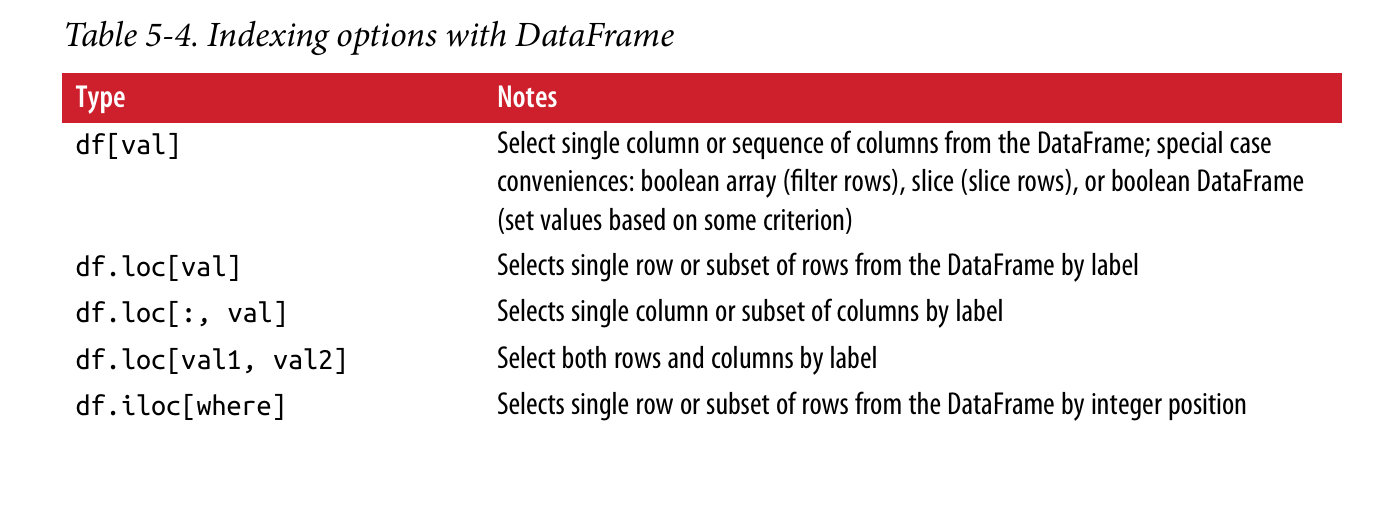
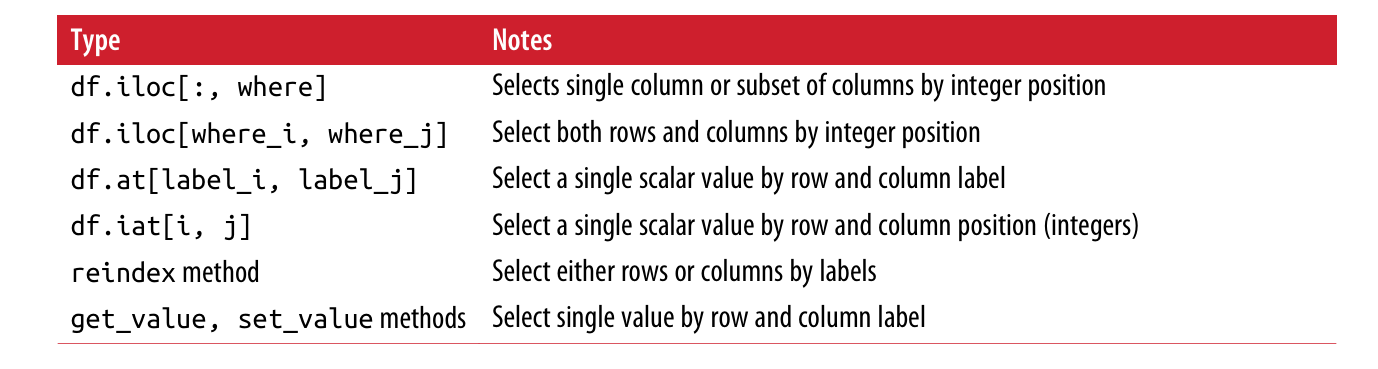

#### Arithmetic and Data Alignment 
1.  When you are adding together objects, if any index pairs are not the same, the respective index in the result will be the union of the index pairs
2. The internal data alignment introduces missing values in the label locations that don’t overlap. Missing values will then propagate in further arithmetic computation
3. In the case of DataFrame, alignment is performed on both the rows and the columns
4. In case of dataframe all the rows and column labels which do not overlap in both data objects are filled as NaN values 
5. If you add DataFrame objects with no column or row labels in common, the result will contain all nulls

In [109]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],index=['a', 'c', 'e', 'f', 'g'])

In [110]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [111]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [112]:
s1+s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

*For Dataframes*

In [113]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [114]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [115]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [116]:
df1+df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


*If No Labels are used in case of Rows and Columns attributes*

In [117]:
nolabel_df1=pd.DataFrame({'A':[1,2]})
nolabel_df2=pd.DataFrame({'B':[4,235]})
nolabel_df1+nolabel_df2

,A,B
0,NaN,NaN
1,NaN,NaN


**Arithmetic Labels with `fill_values` in order to avoid NaN in case of arithmetic evaluation while dealing with values which won't overlap or are missing values** \
1.  In arithmetic operations between differently indexed objects, you might want to fill
 with a special value, like 0, when an axis label is found in one object but not the other
2. Using the add method on df1, I pass df2 and an argument to fill_value `df1.add(df2,fill_values=0)`
3. Similar type of Approach can be used while reindexing  `df1.reindex(columns=df2.columns, fill_value=0)` 

In [118]:
new_df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),columns=list('abcd'))

new_df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),columns=list('abcde'))

In [120]:
new_df1+new_df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [124]:
new_df1.add(new_df2,fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


![Screenshot 2024-08-20 212131.png](<attachment:Screenshot 2024-08-20 212131.png>)
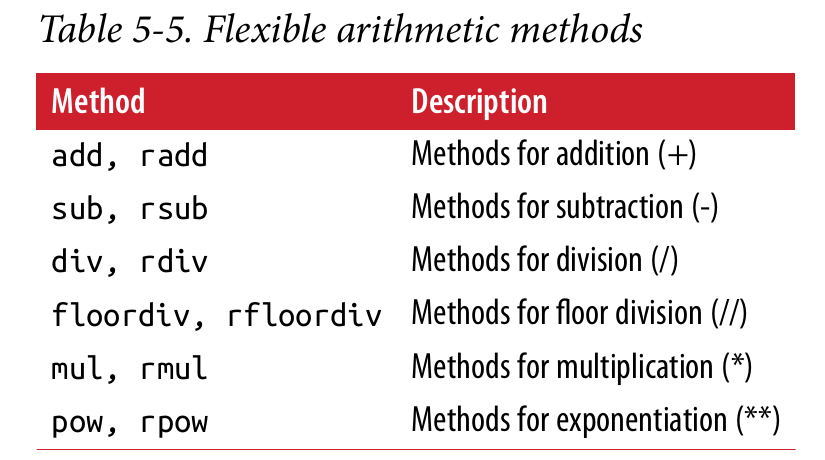